# Books Goodreader

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! head -n 2 books-goodreader.csv

bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
1,Harry Potter and the Half-Blood Prince (Harry Potter  #6),J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249


In [3]:
! wc -l books-goodreader.csv #Tiene 13720 filas
! awk -F, '{print NF; exit}' books-goodreader.csv #Para saber el número de columnas

   13720 books-goodreader.csv
10


In [5]:
df = pd.read_csv("books-goodreader.csv", sep=',', error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [6]:
print(df.shape)
df.describe().round(decimals=0)

(13714, 10)


,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.0,13714.0,1.371400e+04,13714.0,13714.0,13714.0
mean,22160.0,4.0,9.764017e+12,342.0,17765.0,534.0
std,13701.0,0.0,3.987679e+11,253.0,112957.0,2529.0
min,1.0,0.0,8.987060e+09,0.0,0.0,0.0
25%,10619.0,4.0,9.780345e+12,196.0,83.0,7.0
50%,21322.0,4.0,9.780613e+12,301.0,630.0,40.0
75%,33312.0,4.0,9.780940e+12,421.0,4742.0,222.0
max,47709.0,5.0,9.790008e+12,6576.0,5629932.0,93619.0


In [17]:
df.sample(3) #Vemos una muestra

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
6033,18031,Ukridge,P.G. Wodehouse,3.89,1585674796,9781585674794,eng,272,987,80
2543,7717,The Metamorphosis (Graphic Novel Adaptation),Peter Kuper-Franz Kafka-Kerstin Hasenpusch,3.77,1400047951,9781400047956,eng,80,144,21
2811,8705,Dirk Gently's Holistic Detective Agency / The ...,Douglas Adams,4.18,0517119129,9780517119129,eng,436,238,18


In [23]:
print(np.mean(df['ratings_count'])) #Cuál es la media de ratings?
print(np.median(df['ratings_count'])) #Cuál es la mediana de ratings?
print(np.std(df['ratings_count'])) # Vemos que la desviacion estándar es muy alta

17765.397258276214
630.5
112953.10718356872


In [33]:
#Porcentaje de datos respecto al total que tienen menos de 00 ratings
(df[df['ratings_count'] < 100].count())*100/ df.shape[0]

bookID                27.110981
title                 27.110981
authors               27.110981
average_rating        27.110981
isbn                  27.110981
isbn13                27.110981
language_code         27.110981
# num_pages           27.110981
ratings_count         27.110981
text_reviews_count    27.110981
dtype: float64

In [36]:
# Porcentaje de libros en español respecto al total
(df[df['language_code'] == 'spa'].count())*100/ df.shape[0]
# Porcentaje de libros en que no son en inglés
(df[df['language_code'] != 'eng'].count())*100/ df.shape[0]

bookID                22.750474
title                 22.750474
authors               22.750474
average_rating        22.750474
isbn                  22.750474
isbn13                22.750474
language_code         22.750474
# num_pages           22.750474
ratings_count         22.750474
text_reviews_count    22.750474
dtype: float64

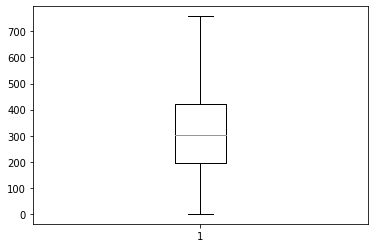

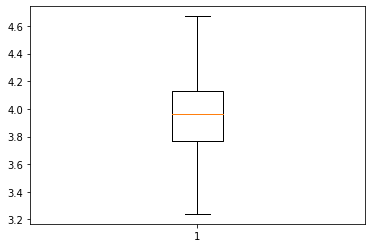

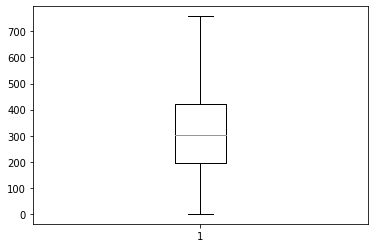

In [51]:
#Vamos a ver cómo están distribuidos los datos, quitando los outliers
plt.boxplot(df['# num_pages'], showfliers=False)
plt.show()
plt.boxplot(df['average_rating'], showfliers=False)
plt.show()
plt.boxplot(df['# num_pages'], showfliers=False)
plt.show()

In [100]:
#Agrupamos por media y contamos los que hay con determinados rangos de puntuación
df_group = df.groupby(pd.cut(df["average_rating"], np.arange(0, 5.0, 0.5))).count()
df_group

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
average_rating,,,,,,,,,,
"(0.0, 0.5]",0,0,0,0,0,0,0,0,0,0
"(0.5, 1.0]",2,2,2,2,2,2,2,2,2,2
"(1.0, 1.5]",0,0,0,0,0,0,0,0,0,0
"(1.5, 2.0]",11,11,11,11,11,11,11,11,11,11
"(2.0, 2.5]",9,9,9,9,9,9,9,9,9,9
"(2.5, 3.0]",79,79,79,79,79,79,79,79,79,79
"(3.0, 3.5]",862,862,862,862,862,862,862,862,862,862
"(3.5, 4.0]",6959,6959,6959,6959,6959,6959,6959,6959,6959,6959
"(4.0, 4.5]",5515,5515,5515,5515,5515,5515,5515,5515,5515,5515


In [112]:
#Ahora hacemos esto así porque si hacemos lo anterior sale error, porque 
# "float() argument must be a string or a number, not 'pandas._libs.interval.Interval'"" y si lo
# Hacemos lista se reduce el número de datos, habría que hacer otra columna con los rangos.
df_per_date =df.groupby("average_rating").count()
df_per_date

,bookID,title,authors,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
average_rating,,,,,,,,,
0.00,34,34,34,34,34,34,34,34,34
1.00,2,2,2,2,2,2,2,2,2
1.67,1,1,1,1,1,1,1,1,1
2.00,10,10,10,10,10,10,10,10,10
2.33,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
4.86,1,1,1,1,1,1,1,1,1
4.87,1,1,1,1,1,1,1,1,1
4.88,1,1,1,1,1,1,1,1,1


In [113]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


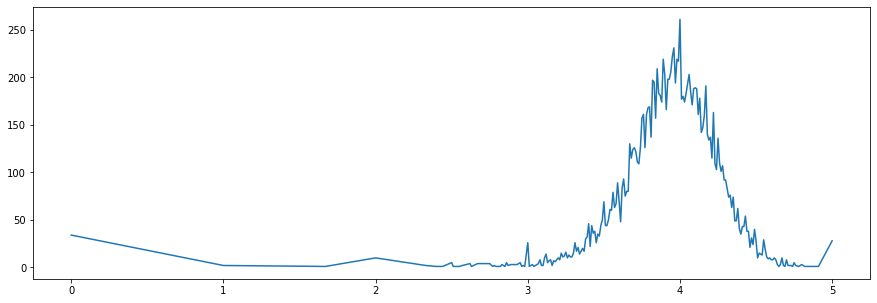

In [124]:
# Así vemos donde se situan los libros mejor en un gráfico, con el conteo de todas las notas
plt.figure(figsize=(15,5))
plt.plot(df_per_date.index, df_per_date["# num_pages"]);

In [115]:
#Para investigar mejor lo anterior quitamos los oautliers
df_nooutliners = df[df["# num_pages"] < 2000]

Text(0, 0.5, 'Media Ratings')

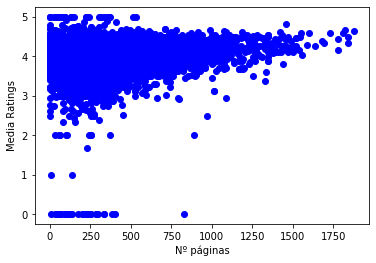

In [117]:
#Hay correlación entre número de páginas y Media de ratings?
plt.plot(df_nooutliners["# num_pages"], df_nooutliners["average_rating"], "bo")
plt.xlabel("Nº páginas")
plt.ylabel("Media Ratings")

In [125]:
r = df_nooutliners.corr(method="pearson")["# num_pages"]["average_rating"]
r
#Realmente no hay mucha correlación

0.16175885360497996

In [126]:
df[df["average_rating"] == 0].count()
#Valores con Media de rating 0

bookID                34
title                 34
authors               34
average_rating        34
isbn                  34
isbn13                34
language_code         34
# num_pages           34
ratings_count         34
text_reviews_count    34
dtype: int64

In [127]:
df[df["ratings_count"] == 0].count()
# Valores que no tienen ratings

bookID                114
title                 114
authors               114
average_rating        114
isbn                  114
isbn13                114
language_code         114
# num_pages           114
ratings_count         114
text_reviews_count    114
dtype: int64